In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv(r"/home/akash/Downloads/spam_ham_dataset.csv")

In [3]:
df

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0
...,...,...,...,...
5166,1518,ham,Subject: put the 10 on the ft\r\nthe transport...,0
5167,404,ham,Subject: 3 / 4 / 2000 and following noms\r\nhp...,0
5168,2933,ham,Subject: calpine daily gas nomination\r\n>\r\n...,0
5169,1409,ham,Subject: industrial worksheets for august 2000...,0


In [4]:
df = df.drop('label', axis=1)

In [5]:
df

,Unnamed: 0,text,label_num
0,605,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,"Subject: photoshop , windows , office . cheap ...",1
4,2030,Subject: re : indian springs\r\nthis deal is t...,0
...,...,...,...
5166,1518,Subject: put the 10 on the ft\r\nthe transport...,0
5167,404,Subject: 3 / 4 / 2000 and following noms\r\nhp...,0
5168,2933,Subject: calpine daily gas nomination\r\n>\r\n...,0
5169,1409,Subject: industrial worksheets for august 2000...,0


In [6]:
df = df.drop(columns=["Unnamed: 0"])

In [7]:
x=df['text']
y=df['label_num']

In [8]:
x

0       Subject: enron methanol ; meter # : 988291\r\n...
1       Subject: hpl nom for january 9 , 2001\r\n( see...
2       Subject: neon retreat\r\nho ho ho , we ' re ar...
3       Subject: photoshop , windows , office . cheap ...
4       Subject: re : indian springs\r\nthis deal is t...
                              ...                        
5166    Subject: put the 10 on the ft\r\nthe transport...
5167    Subject: 3 / 4 / 2000 and following noms\r\nhp...
5168    Subject: calpine daily gas nomination\r\n>\r\n...
5169    Subject: industrial worksheets for august 2000...
5170    Subject: important online banking alert\r\ndea...
Name: text, Length: 5171, dtype: object

In [9]:
y

0       0
1       0
2       0
3       1
4       0
       ..
5166    0
5167    0
5168    0
5169    0
5170    1
Name: label_num, Length: 5171, dtype: int64

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(
    stop_words="english",   # remove common words
    max_features=10000,     # cap vocab size (tune as you like)
    ngram_range=(1, 2)      # unigrams + bigrams (captures phrases like "online banking")
)

# Fit on training text, transform both train & test
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)


In [13]:
X_train

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 286221 stored elements and shape (4136, 10000)>

In [14]:
from sklearn.naive_bayes import MultinomialNB
model=MultinomialNB()

In [15]:
model.fit(X_train,y_train)

,alpha,1.0
,force_alpha,True
,fit_prior,True
,class_prior,None


In [16]:
y_pred=model.predict(X_test)

In [19]:
from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.96      0.97      0.97       736
           1       0.93      0.91      0.92       299

    accuracy                           0.95      1035
   macro avg       0.95      0.94      0.94      1035
weighted avg       0.95      0.95      0.95      1035



In [21]:
c_matrix=confusion_matrix(y_pred,y_test)
disp = ConfusionMatrixDisplay(confusion_matrix=c_matrix, display_labels=model.classes_)

<Figure size 600x600 with 0 Axes>

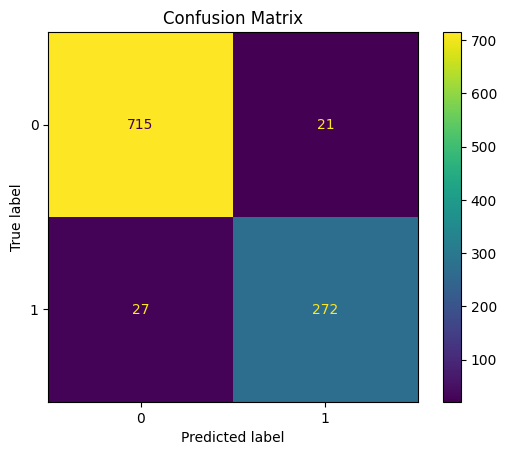

In [22]:
plt.figure(figsize=(6, 6))
disp.plot(values_format='d')
plt.title("Confusion Matrix")
plt.show()